### Imports

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
import sklearn.cluster
import scipy
import skimage

### Utility Functions

In [3]:
# Interface to show image files
def imshow2(img, title="Image") :
    cv2.imshow(title, img)
    input = cv2.waitKey(0)

    # press x in the opened window to destroy all windows
    if input == ord('x') :
        cv2.destroyAllWindows()

# does not revert colors
def plt_imshow1(img, title=""):
    
    ax = plt.gca()
    ax.axes.xaxis.set_visible(True)
    ax.axes.yaxis.set_visible(True)
    plt.imshow(img)
    if title != "" :
        plt.title(title)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(True)
    plt.show()

def plt_imshow2(img, title=""):
    
    ax = plt.gca()
    ax.axes.xaxis.set_visible(True)
    ax.axes.yaxis.set_visible(True)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    if title != "" :
        plt.title(title)
    ax = plt.gca()
    ax.axes.xaxis.set_visible(True)
    plt.show()

# display images , horizontally stacked
def display_stacked2(img_list, title_list) :
    assert(len(img_list)>0) 

    fin_img = img_list[0] 
    title = 'Images (Left to right) ' + title_list[0] 
    for i in range(1, len(img_list)) :
        fin_img = cv2.hconcat([fin_img, img_list[i]]) 
        title += ' ' + title_list[i] 

    plt_imshow2(fin_img, title)

# Color Based Segmentation

## K means Clustering

### Trying it out

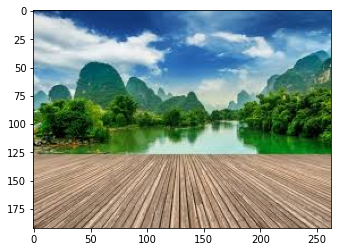

In [4]:
img1 = plt.imread('landscape_1.jpeg')
img1.shape
plt_imshow1(img1)

In [7]:
# reshape for clustering
img1_n = img1.reshape(img1.shape[0]*img1.shape[1], img1.shape[2])
img1_n

array([[ 28,  64, 114],
       [ 56,  92, 142],
       [ 64, 102, 151],
       ...,
       [120,  99,  72],
       [153, 132, 105],
       [180, 159, 132]], dtype=uint8)

In [13]:
kmeans = sklearn.cluster.KMeans(n_clusters=5, random_state=0).fit(img1_n)


In [15]:
cluster_img_n = kmeans.cluster_centers_[kmeans.labels_]
cluster_img1 = cluster_img_n.reshape(img1.shape)
cluster_img1 = cluster_img1.astype(np.uint8)
cluster_img1

array([[[ 40,  96, 133],
        [ 40,  96, 133],
        [ 40,  96, 133],
        ...,
        [ 40,  96, 133],
        [ 40,  96, 133],
        [ 40,  96, 133]],

       [[ 40,  96, 133],
        [ 40,  96, 133],
        [ 40,  96, 133],
        ...,
        [ 40,  96, 133],
        [ 40,  96, 133],
        [ 40,  96, 133]],

       [[108, 159, 191],
        [108, 159, 191],
        [ 40,  96, 133],
        ...,
        [ 40,  96, 133],
        [ 40,  96, 133],
        [ 40,  96, 133]],

       ...,

       [[168, 145, 119],
        [168, 145, 119],
        [168, 145, 119],
        ...,
        [168, 145, 119],
        [168, 145, 119],
        [168, 145, 119]],

       [[168, 145, 119],
        [ 42,  83,  28],
        [ 42,  83,  28],
        ...,
        [196, 208, 204],
        [168, 145, 119],
        [168, 145, 119]],

       [[ 42,  83,  28],
        [ 42,  83,  28],
        [ 42,  83,  28],
        ...,
        [168, 145, 119],
        [168, 145, 119],
        [168, 145, 119]]

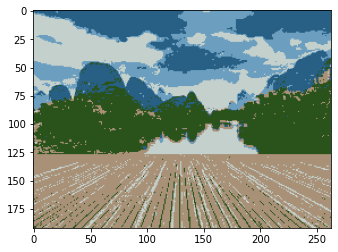

In [16]:
plt.imshow(cluster_img1)

### Generalized function

In [17]:
def get_clustered_image(img, n_clusters=3):
    img_n = img.reshape(img.shape[0]*img.shape[1], img.shape[2])
    kmeans = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=0).fit(img_n)
    cluster_img_n = kmeans.cluster_centers_[kmeans.labels_]
    cluster_img = cluster_img_n.reshape(img.shape)
    return cluster_img.astype(np.uint8)

In [23]:
def show_clusterting(img, n_clusters=3):
    cluster_img = get_clustered_image(img, n_clusters)
    display_stacked2([img, cluster_img], ['Original', 'Clustered'])


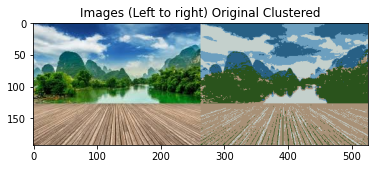

In [28]:

show_clusterting(cv2.imread('landscape_1.jpeg'), 5)

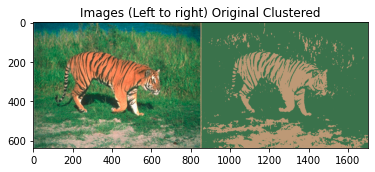

In [27]:
show_clusterting(cv2.imread('tiger.png'), 2)